# Arrhythmia Machine Learning Project
## Data Cleaning Notebook

We will first import the necessary Python modules.

In [39]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Preprocessing

We will start by hand-defining all $279$ column names for our data set using a list in Python and the names from the arrhythmia.names file downloaded from the UCI ML Repository

In [40]:
col_names = ['Age', 'Sex', 'Height (cm)', 'Weight (kg)', 'QRS Duration (msec)', 
             'P-R Interval (msec)', 'Q-T Interval (msec)', 'T Interval (msec)', 
             'P Interval (msec)', 'Vector Angles for QRS (degrees)', 
             'Vector Angles for T (degrees)', 'Vector Angles for P (degrees)', 
             'Vector Angles for QRST (degrees)', 'Vector Angles for J (degrees)', 
             'Heart Rate (bpm)', 'DI Q Wave (msec)', 'DI R Wave (msec)', 
             'DI S Wave (msec)', "DI R' Wave (msec)", "DI S' Wave (msec)", 
             'DI Number of Intrinsic Deflections', 'DI Existence of Ragged R Wave', 
             'DI Existence of Diphasic Derivation of R Wave', 
             'DI Existence of Raged P Wave', 
             'DI Existence of Diphasic Derivation of P Wave', 
             'DI Existence of Ragged T Wave', 
             'DI Existence of Diphasic Derivation of T Wave', 
             'DII Q Wave (msec)', 'DII R Wave (msec)', 'DII S Wave (msec)', 
             "DII R' Wave (msec)", "DII S' Wave (msec)", 
             'DII Number of Intrinsic Deflections', 
             'DII Existence of Ragged R Wave', 
             'DII Existence of Diphasic Derivation of R Wave', 
             'DII Existence of Raged P Wave', 
             'DII Existence of Diphasic Derivation of P Wave', 
             'DII Existence of Ragged T Wave', 
             'DII Existence of Diphasic Derivation of T Wave',
             'DIII Q Wave (msec)', 'DIII R Wave (msec)', 'DIII S Wave (msec)', 
             "DIII R' Wave (msec)", "DIII S' Wave (msec)", 
             'DIII Number of Intrinsic Deflections', 
             'DIII Existence of Ragged R Wave', 
             'DIII Existence of Diphasic Derivation of R Wave', 
             'DIII Existence of Raged P Wave', 
             'DIII Existence of Diphasic Derivation of P Wave', 
             'DIII Existence of Ragged T Wave', 
             'DIII Existence of Diphasic Derivation of T Wave',
             'AVR Q Wave (msec)', 'AVR R Wave (msec)', 'AVR S Wave (msec)', 
             "AVR R' Wave (msec)", "AVR S' Wave (msec)", 
             'AVR Number of Intrinsic Deflections', 
             'AVR Existence of Ragged R Wave', 
             'AVR Existence of Diphasic Derivation of R Wave', 
             'AVR Existence of Raged P Wave', 
             'AVR Existence of Diphasic Derivation of P Wave', 
             'AVR Existence of Ragged T Wave', 
             'AVR Existence of Diphasic Derivation of T Wave',
             'AVL Q Wave (msec)', 'AVL R Wave (msec)', 'AVL S Wave (msec)', 
             "AVL R' Wave (msec)", "AVL S' Wave (msec)", 
             'AVL Number of Intrinsic Deflections', 
             'AVL Existence of Ragged R Wave', 
             'AVL Existence of Diphasic Derivation of R Wave', 
             'AVL Existence of Raged P Wave', 
             'AVL Existence of Diphasic Derivation of P Wave', 
             'AVL Existence of Ragged T Wave', 
             'AVL Existence of Diphasic Derivation of T Wave',
             'AVF Q Wave (msec)', 'AVF R Wave (msec)', 'AVF S Wave (msec)', 
             "AVF R' Wave (msec)", "AVF S' Wave (msec)", 
             'AVF Number of Intrinsic Deflections', 
             'AVF Existence of Ragged R Wave', 
             'AVF Existence of Diphasic Derivation of R Wave', 
             'AVF Existence of Raged P Wave', 
             'AVF Existence of Diphasic Derivation of P Wave', 
             'AVF Existence of Ragged T Wave', 
             'AVF Existence of Diphasic Derivation of T Wave',
             'V1 Q Wave (msec)', 'V1 R Wave (msec)', 'V1 S Wave (msec)', 
             "V1 R' Wave (msec)", "V1 S' Wave (msec)", 
             'V1 Number of Intrinsic Deflections', 
             'V1 Existence of Ragged R Wave', 
             'V1 Existence of Diphasic Derivation of R Wave', 
             'V1 Existence of Raged P Wave', 
             'V1 Existence of Diphasic Derivation of P Wave', 
             'V1 Existence of Ragged T Wave', 
             'V1 Existence of Diphasic Derivation of T Wave',
             'V2 Q Wave (msec)', 'V2 R Wave (msec)', 'V2 S Wave (msec)', 
             "V2 R' Wave (msec)", "V2 S' Wave (msec)", 
             'V2 Number of Intrinsic Deflections', 
             'V2 Existence of Ragged R Wave', 
             'V2 Existence of Diphasic Derivation of R Wave', 
             'V2 Existence of Raged P Wave', 
             'V2 Existence of Diphasic Derivation of P Wave', 
             'V2 Existence of Ragged T Wave', 
             'V2 Existence of Diphasic Derivation of T Wave',
             'V3 Q Wave (msec)', 'V3 R Wave (msec)', 'V3 S Wave (msec)', 
             "V3 R' Wave (msec)", "V3 S' Wave (msec)", 
             'V3 Number of Intrinsic Deflections', 
             'V3 Existence of Ragged R Wave', 
             'V3 Existence of Diphasic Derivation of R Wave', 
             'V3 Existence of Raged P Wave', 
             'V3 Existence of Diphasic Derivation of P Wave', 
             'V3 Existence of Ragged T Wave', 
             'V3 Existence of Diphasic Derivation of T Wave',
             'V4 Q Wave (msec)', 'V4 R Wave (msec)', 'V4 S Wave (msec)', 
             "V4 R' Wave (msec)", "V4 S' Wave (msec)", 
             'V4 Number of Intrinsic Deflections', 
             'V4 Existence of Ragged R Wave', 
             'V4 Existence of Diphasic Derivation of R Wave', 
             'V4 Existence of Raged P Wave', 
             'V4 Existence of Diphasic Derivation of P Wave', 
             'V4 Existence of Ragged T Wave', 
             'V4 Existence of Diphasic Derivation of T Wave',
             'V5 Q Wave (msec)', 'V5 R Wave (msec)', 'V5 S Wave (msec)', 
             "V5 R' Wave (msec)", "V5 S' Wave (msec)", 
             'V5 Number of Intrinsic Deflections', 
             'V5 Existence of Ragged R Wave', 
             'V5 Existence of Diphasic Derivation of R Wave', 
             'V5 Existence of Raged P Wave', 
             'V5 Existence of Diphasic Derivation of P Wave', 
             'V5 Existence of Ragged T Wave', 
             'V5 Existence of Diphasic Derivation of T Wave',
             'V6 Q Wave (msec)', 'V6 R Wave (msec)', 'V6 S Wave (msec)', 
             "V6 R' Wave (msec)", "V6 S' Wave (msec)", 
             'V6 Number of Intrinsic Deflections', 
             'V6 Existence of Ragged R Wave', 
             'V6 Existence of Diphasic Derivation of R Wave', 
             'V6 Existence of Raged P Wave', 
             'V6 Existence of Diphasic Derivation of P Wave', 
             'V6 Existence of Ragged T Wave', 
             'V6 Existence of Diphasic Derivation of T Wave',
             'DI Amplitude *0.1 mV of JJ Wave', 'DI Amplitude *0.1 mV of Q wave',
             'DI Amplitude *0.1 mV of R Wave', 'DI Amplitude *0.1 mV of S Wave',
             "DI Amplitude *0.1 mV of R' Wave", "DI Amplitude *0.1 mV of S' Wave",
             'DI Amplitude *0.1 mV of P Wave', 'DI Amplitude *0.1 mV of T Wave',
             'DI QRSA', 'DI QRSTA', 
             'DII Amplitude *0.1 mV of JJ Wave', 'DII Amplitude *0.1 mV of Q wave',
             'DII Amplitude *0.1 mV of R Wave', 'DII Amplitude *0.1 mV of S Wave',
             "DII Amplitude *0.1 mV of R' Wave", "DII Amplitude *0.1 mV of S' Wave",
             'DII Amplitude *0.1 mV of P Wave', 'DII Amplitude *0.1 mV of T Wave',
             'DII QRSA', 'DII QRSTA',
             'DIII Amplitude *0.1 mV of JJ Wave', 'DIII Amplitude *0.1 mV of Q wave',
             'DIII Amplitude *0.1 mV of R Wave', 'DIII Amplitude *0.1 mV of S Wave',
             "DIII Amplitude *0.1 mV of R' Wave", "DIII Amplitude *0.1 mV of S' Wave",
             'DIII Amplitude *0.1 mV of P Wave', 'DIII Amplitude *0.1 mV of T Wave',
             'DIII QRSA', 'DIII QRSTA',
             'AVR Amplitude *0.1 mV of JJ Wave', 'AVR Amplitude *0.1 mV of Q wave',
             'AVR Amplitude *0.1 mV of R Wave', 'AVR Amplitude *0.1 mV of S Wave',
             "AVR Amplitude *0.1 mV of R' Wave", "AVR Amplitude *0.1 mV of S' Wave",
             'AVR Amplitude *0.1 mV of P Wave', 'AVR Amplitude *0.1 mV of T Wave',
             'AVR QRSA', 'AVR QRSTA',
             'AVL Amplitude *0.1 mV of JJ Wave', 'AVL Amplitude *0.1 mV of Q wave',
             'AVL Amplitude *0.1 mV of R Wave', 'AVL Amplitude *0.1 mV of S Wave',
             "AVL Amplitude *0.1 mV of R' Wave", "AVL Amplitude *0.1 mV of S' Wave",
             'AVL Amplitude *0.1 mV of P Wave', 'AVL Amplitude *0.1 mV of T Wave',
             'AVL QRSA', 'AVL QRSTA',
             'AVF Amplitude *0.1 mV of JJ Wave', 'AVF Amplitude *0.1 mV of Q wave',
             'AVF Amplitude *0.1 mV of R Wave', 'AVF Amplitude *0.1 mV of S Wave',
             "AVF Amplitude *0.1 mV of R' Wave", "AVF Amplitude *0.1 mV of S' Wave",
             'AVF Amplitude *0.1 mV of P Wave', 'AVF Amplitude *0.1 mV of T Wave',
             'AVF QRSA', 'AVF QRSTA',
             'V1 Amplitude *0.1 mV of JJ Wave', 'V1 Amplitude *0.1 mV of Q wave',
             'V1 Amplitude *0.1 mV of R Wave', 'V1 Amplitude *0.1 mV of S Wave',
             "V1 Amplitude *0.1 mV of R' Wave", "V1 Amplitude *0.1 mV of S' Wave",
             'V1 Amplitude *0.1 mV of P Wave', 'V1 Amplitude *0.1 mV of T Wave',
             'V1 QRSA', 'V1 QRSTA',
             'V2 Amplitude *0.1 mV of JJ Wave', 'V2 Amplitude *0.1 mV of Q wave',
             'V2 Amplitude *0.1 mV of R Wave', 'V2 Amplitude *0.1 mV of S Wave',
             "V2 Amplitude *0.1 mV of R' Wave", "V2 Amplitude *0.1 mV of S' Wave",
             'V2 Amplitude *0.1 mV of P Wave', 'V2 Amplitude *0.1 mV of T Wave',
             'V2 QRSA', 'V2 QRSTA',
             'V3 Amplitude *0.1 mV of JJ Wave', 'V3 Amplitude *0.1 mV of Q wave',
             'V3 Amplitude *0.1 mV of R Wave', 'V3 Amplitude *0.1 mV of S Wave',
             "V3 Amplitude *0.1 mV of R' Wave", "V3 Amplitude *0.1 mV of S' Wave",
             'V3 Amplitude *0.1 mV of P Wave', 'V3 Amplitude *0.1 mV of T Wave',
             'V3 QRSA', 'V3 QRSTA',
             'V4 Amplitude *0.1 mV of JJ Wave', 'V4 Amplitude *0.1 mV of Q wave',
             'V4 Amplitude *0.1 mV of R Wave', 'V4 Amplitude *0.1 mV of S Wave',
             "V4 Amplitude *0.1 mV of R' Wave", "V4 Amplitude *0.1 mV of S' Wave",
             'V4 Amplitude *0.1 mV of P Wave', 'V4 Amplitude *0.1 mV of T Wave',
             'V4 QRSA', 'V4 QRSTA',
             'V5 Amplitude *0.1 mV of JJ Wave', 'V5 Amplitude *0.1 mV of Q wave',
             'V5 Amplitude *0.1 mV of R Wave', 'V5 Amplitude *0.1 mV of S Wave',
             "V5 Amplitude *0.1 mV of R' Wave", "V5 Amplitude *0.1 mV of S' Wave",
             'V5 Amplitude *0.1 mV of P Wave', 'V5 Amplitude *0.1 mV of T Wave',
             'V5 QRSA', 'V5 QRSTA',
             'V6 Amplitude *0.1 mV of JJ Wave', 'V6 Amplitude *0.1 mV of Q wave',
             'V6 Amplitude *0.1 mV of R Wave', 'V6 Amplitude *0.1 mV of S Wave',
             "V6 Amplitude *0.1 mV of R' Wave", "V6 Amplitude *0.1 mV of S' Wave",
             'V6 Amplitude *0.1 mV of P Wave', 'V6 Amplitude *0.1 mV of T Wave',
             'V6 QRSA', 'V6 QRSTA',
             'Arrhythmia Class']

We will now read the original arrhythmia data into a data frame without using a header because the first line of the arrhythmia data file does not contain the column names.

In [41]:
arrhythmia_data = pd.read_csv('arrhythmia.data', header = None)

We will now set the column names of the arrhythmia data frame to be the column names we hand-typed ealier.

In [42]:
arrhythmia_data.columns = col_names

We will now display the first $5$ rows the arrhythmia data to make sure that everything looks correct.

In [43]:
arrhythmia_data.head()

,Age,Sex,Height (cm),Weight (kg),QRS Duration (msec),P-R Interval (msec),Q-T Interval (msec),T Interval (msec),P Interval (msec),Vector Angles for QRS (degrees),...,V6 Amplitude *0.1 mV of Q wave,V6 Amplitude *0.1 mV of R Wave,V6 Amplitude *0.1 mV of S Wave,V6 Amplitude *0.1 mV of R' Wave,V6 Amplitude *0.1 mV of S' Wave,V6 Amplitude *0.1 mV of P Wave,V6 Amplitude *0.1 mV of T Wave,V6 QRSA,V6 QRSTA,Arrhythmia Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


## Exploratory Data Analysis

In this section, we will analyze the data in the arrhythmia data set and clean the data to remove missing values.

Since there are too many values in the arrythmia data set to visualize the data, we will use the `describe()` method to get a numberical summary of the data in the arrhythmia data set.

In [44]:
arrhythmia_data.describe()

,Age,Sex,Height (cm),Weight (kg),QRS Duration (msec),P-R Interval (msec),Q-T Interval (msec),T Interval (msec),P Interval (msec),Vector Angles for QRS (degrees),...,V6 Amplitude *0.1 mV of Q wave,V6 Amplitude *0.1 mV of R Wave,V6 Amplitude *0.1 mV of S Wave,V6 Amplitude *0.1 mV of R' Wave,V6 Amplitude *0.1 mV of S' Wave,V6 Amplitude *0.1 mV of P Wave,V6 Amplitude *0.1 mV of T Wave,V6 QRSA,V6 QRSTA,Arrhythmia Class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


Observe that the `count` row has a value of $452$ for each of the columns, which indicates that there is no missing data in any of the columns.  Further notice that the numeric values seem consistent with typical values for an EKG and the demographic values.

We will now use the `info()` method to look at the data types of the columns in the arrhythmia data set.

In [45]:
arrhythmia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Age to Arrhythmia Class
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


Notice that the output of the call to the `info()` method indicates that $5$ of the columns have a data type of `object`.  This is strange because our data only contains numeric values, so all the columns should have a data type of `float64` or `int64`.  Since a column with a data type of `object` contains string values, we now need to further investigate the values in the columns whose data type is `object` in order to determine why they have a different data type than we would expect.

We will use the code below to create a list containing the names of columns whose data type is `int64`, a list containing the names of columns whose data type is `float64`, and a list containing the names of columns whose data type is `object`.  We also print each column name and its associated data type in order to determine the names of the columns that contain string values instead of numeric values.

In [46]:
int_cols = []
float_cols = []
object_cols = []

for i in range(len(col_names)):
    data_type = np.dtype(arrhythmia_data.iloc[:,i])
    
    print('Data Type of', col_names[i], ':', data_type)
    
    if data_type == 'int64':
        int_cols.append(i)
    elif data_type == 'float64':
        float_cols.append(i)
    else:
        object_cols.append(i)

Data Type of Age : int64
Data Type of Sex : int64
Data Type of Height (cm) : int64
Data Type of Weight (kg) : int64
Data Type of QRS Duration (msec) : int64
Data Type of P-R Interval (msec) : int64
Data Type of Q-T Interval (msec) : int64
Data Type of T Interval (msec) : int64
Data Type of P Interval (msec) : int64
Data Type of Vector Angles for QRS (degrees) : int64
Data Type of Vector Angles for T (degrees) : object
Data Type of Vector Angles for P (degrees) : object
Data Type of Vector Angles for QRST (degrees) : object
Data Type of Vector Angles for J (degrees) : object
Data Type of Heart Rate (bpm) : object
Data Type of DI Q Wave (msec) : int64
Data Type of DI R Wave (msec) : int64
Data Type of DI S Wave (msec) : int64
Data Type of DI R' Wave (msec) : int64
Data Type of DI S' Wave (msec) : int64
Data Type of DI Number of Intrinsic Deflections : int64
Data Type of DI Existence of Ragged R Wave : int64
Data Type of DI Existence of Diphasic Derivation of R Wave : int64
Data Type of D

We will now create a data frame containing the columns whose data type is `int64` and display the first $5$ entries of the data frame.

In [47]:
arrhythmia_ints = arrhythmia_data.iloc[:,int_cols]

arrhythmia_ints.head()

,Age,Sex,Height (cm),Weight (kg),QRS Duration (msec),P-R Interval (msec),Q-T Interval (msec),T Interval (msec),P Interval (msec),Vector Angles for QRS (degrees),...,V6 R' Wave (msec),V6 S' Wave (msec),V6 Number of Intrinsic Deflections,V6 Existence of Ragged R Wave,V6 Existence of Diphasic Derivation of R Wave,V6 Existence of Raged P Wave,V6 Existence of Diphasic Derivation of P Wave,V6 Existence of Ragged T Wave,V6 Existence of Diphasic Derivation of T Wave,Arrhythmia Class
0,75,0,190,80,91,193,371,174,121,-16,...,0,0,32,0,0,0,0,0,0,8
1,56,1,165,64,81,174,401,149,39,25,...,0,0,28,0,0,0,0,0,0,6
2,54,0,172,95,138,163,386,185,102,96,...,0,0,24,0,0,0,0,0,0,10
3,55,0,175,94,100,202,380,179,143,28,...,0,0,40,0,0,0,0,0,0,1
4,75,0,190,80,88,181,360,177,103,-16,...,0,0,32,0,0,0,0,0,0,7


We will now create a data frame containing the columns whose data type is `float64` and display the first $5$ entries of the data frame.

In [48]:
arrhythmia_floats = arrhythmia_data.iloc[:,float_cols]

arrhythmia_floats.head()

,DI Amplitude *0.1 mV of JJ Wave,DI Amplitude *0.1 mV of Q wave,DI Amplitude *0.1 mV of R Wave,DI Amplitude *0.1 mV of S Wave,DI Amplitude *0.1 mV of R' Wave,DI Amplitude *0.1 mV of S' Wave,DI Amplitude *0.1 mV of P Wave,DI Amplitude *0.1 mV of T Wave,DI QRSA,DI QRSTA,...,V6 Amplitude *0.1 mV of JJ Wave,V6 Amplitude *0.1 mV of Q wave,V6 Amplitude *0.1 mV of R Wave,V6 Amplitude *0.1 mV of S Wave,V6 Amplitude *0.1 mV of R' Wave,V6 Amplitude *0.1 mV of S' Wave,V6 Amplitude *0.1 mV of P Wave,V6 Amplitude *0.1 mV of T Wave,V6 QRSA,V6 QRSTA
0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,1.0,0.0,4.5,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,0.9,0.0,7.8,-0.7,0.0,0.0,1.1,1.9,27.3,45.1,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,0.0,0.0,5.2,-1.4,0.0,0.0,0.9,2.3,9.6,31.6,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


We will now create a data frame containing the columns whose data type is `object` and display the first $5$ entries of the data frame.

In [49]:
arrhythmia_objects = arrhythmia_data.iloc[:,object_cols]

arrhythmia_objects.head()

,Vector Angles for T (degrees),Vector Angles for P (degrees),Vector Angles for QRST (degrees),Vector Angles for J (degrees),Heart Rate (bpm)
0,13,64,-2,?,63
1,37,-17,31,?,53
2,34,70,66,23,75
3,11,-5,20,?,71
4,13,61,3,?,?


From the output of the code shown above, we see that the columns that contain string values have numeric values represented as strings and  `?` values.  This means that the authors of the data set encoded missing values with a value of `'?'`.  Unfortunately, since they used a string to encode missing numeric values in the data set, the data types of the columns containing missing data were converted to `object` and the numeric values in the columns containing missing data were converted to strings containing a numeric value.  

We will now create a list containing the names of the columns that are missing data.

In [50]:
missing_cols = arrhythmia_data.columns[object_cols]

missing_cols

Index(['Vector Angles for T (degrees)', 'Vector Angles for P (degrees)',
       'Vector Angles for QRST (degrees)', 'Vector Angles for J (degrees)',
       'Heart Rate (bpm)'],
      dtype='object')

We will now create a dictionary that has the name of each column that is missing data and the number of missing values in that column.

In [51]:
missing_vals = {}

for missing_col in missing_cols:
    missing_vals[missing_col] = len(np.where(arrhythmia_data[missing_col] == '?')[0])

We will now print the dictionary that tells us how many entries are missing from each column that is missing data.

In [52]:
missing_vals

{'Vector Angles for T (degrees)': 8,
 'Vector Angles for P (degrees)': 22,
 'Vector Angles for QRST (degrees)': 1,
 'Vector Angles for J (degrees)': 376,
 'Heart Rate (bpm)': 1}

Observe that the `Vector Angles for J (degrees)` column is missing the vast majority of its entries, since there are $452$ entries in the data frame.  The remaining columns are missing relatively few entries.

We will now use the `replace()` function to replace all the missing values encoded as `'?'` with `np.nan` in the data set.  This will allow us to then visualize patterns in the missing data.  

In [53]:
arrhythmia = arrhythmia_data.replace(to_replace = '?', value = np.nan)

Now that we have converted the missing values from a string representation to a numeric representation using `np.nan`, we will convert the data type of the columns that are missing data to a numeric data type.  This means that each of the columns whose data type was `object` will now have a data type of either `int64` or `float64` depending on the values in each column.

In [54]:
for i in object_cols:
    arrhythmia.iloc[:,i] = pd.to_numeric(arrhythmia.iloc[:,i])

/tmp/ipykernel_20434/1221385447.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  arrhythmia.iloc[:,i] = pd.to_numeric(arrhythmia.iloc[:,i])


We will now use seaborn to create a heatmap showing the missing values in the entire arrhythmia dataset.  

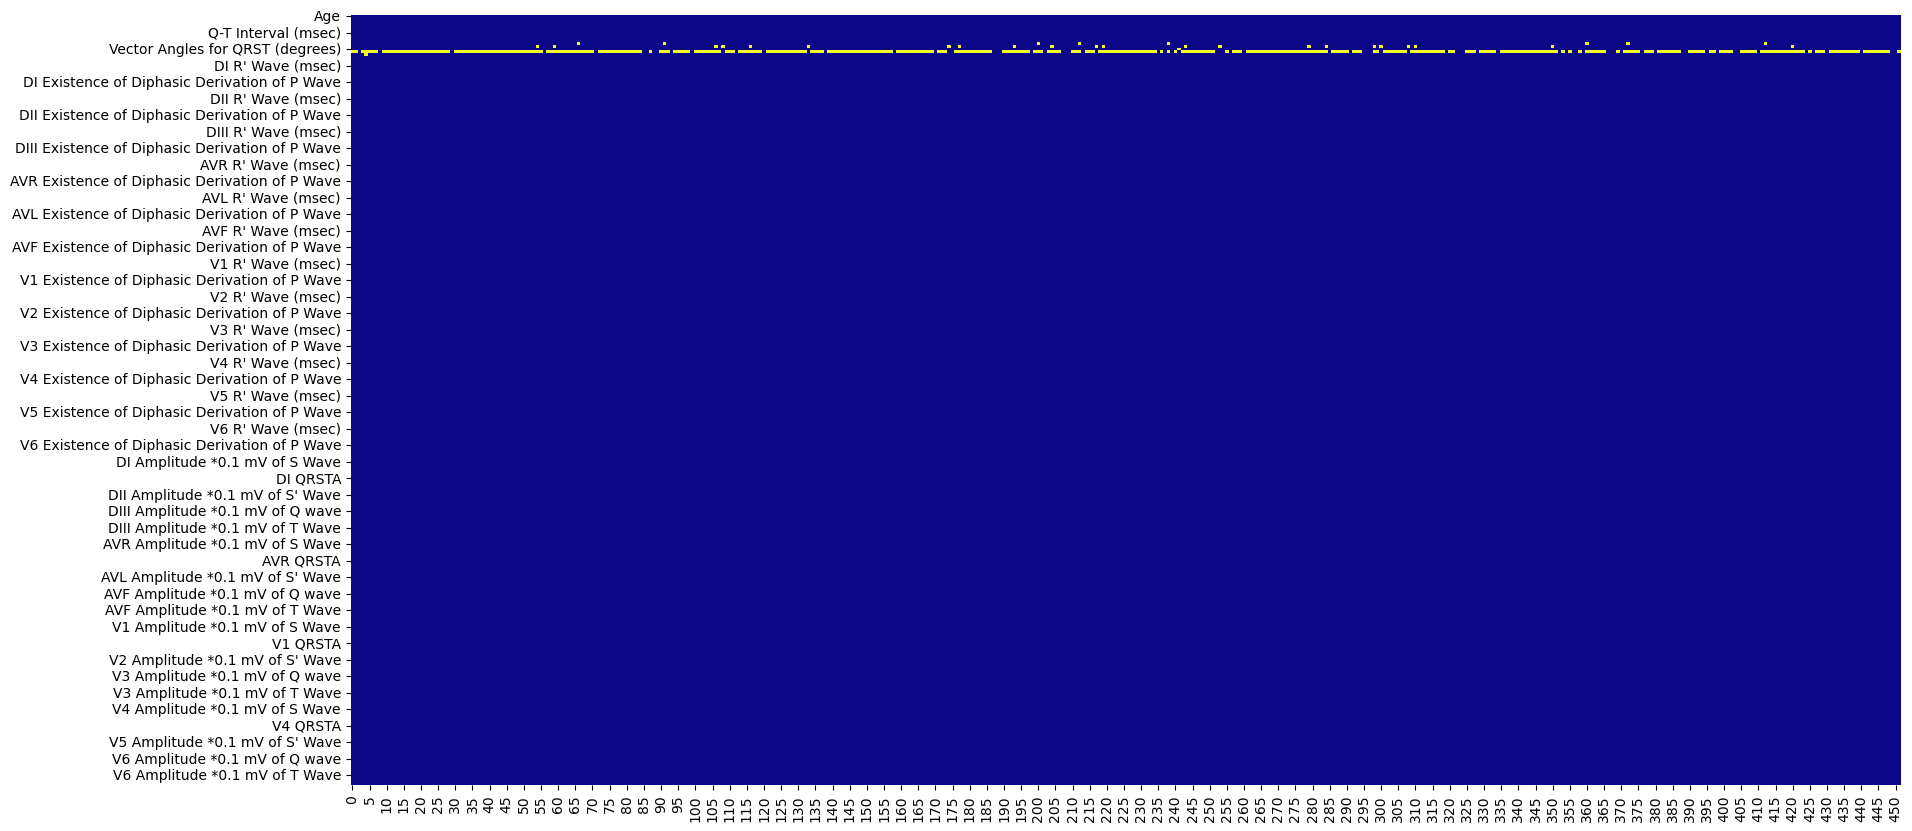

In [55]:
plt.figure(figsize = (20, 10))

splot1 = sb.heatmap(arrhythmia.isna().transpose(), cmap = 'plasma', cbar = False)

plt.savefig('heatmap_missing_vals_all.png')

Notice that it is very hard to see patterns in the missing data in the above visualization because there are $279$ columns in the dataset.  We will now create a new data frame that contains only the columns that are missing data in the arrhythmia data set.  Then, we will create a heatmap using seaborn to visualize the missing values from only the columns that are missing data.  This will let us find patterns in the missing data, if they exist.

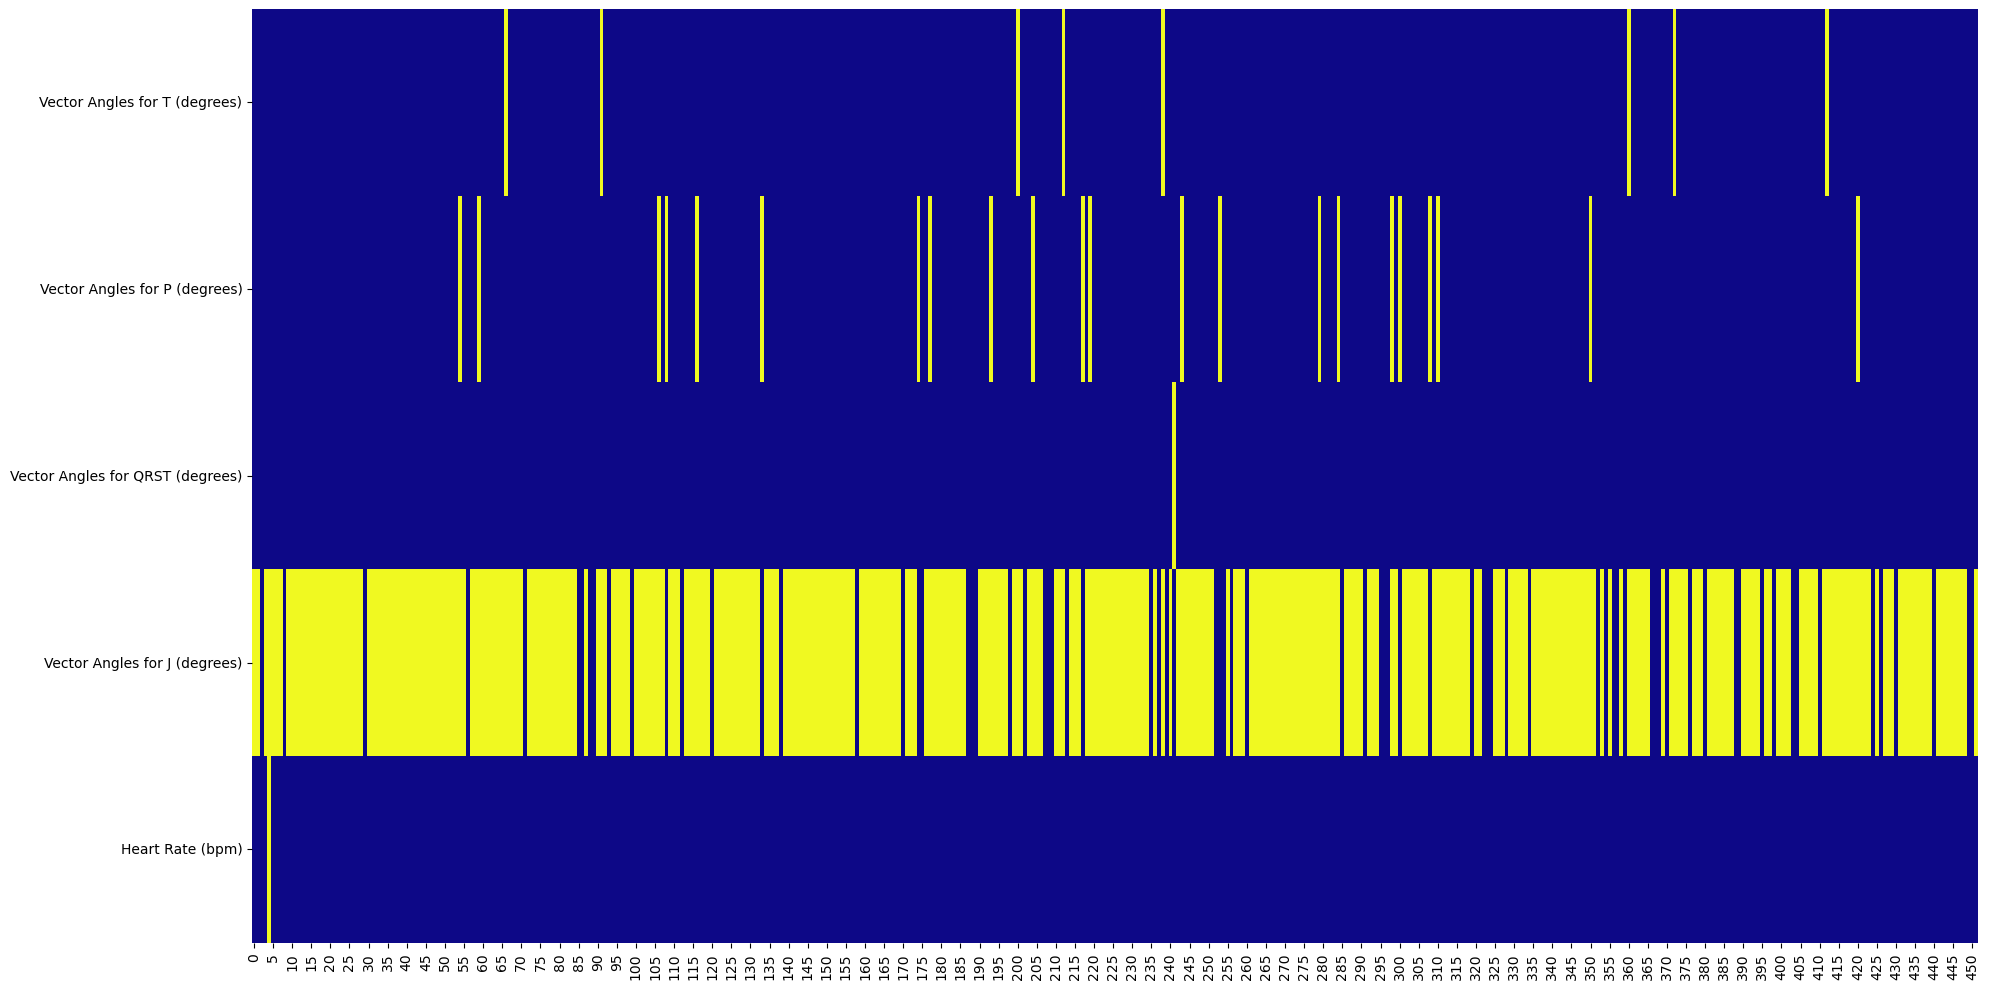

In [56]:
# heatmap with only missing columns

missing = arrhythmia.loc[:, missing_cols]

plt.figure(figsize = (20, 10))

splot = sb.heatmap(missing.isna().transpose(), cmap = 'plasma', cbar = False)

plt.tight_layout()

plt.savefig('heatmap_missing_cols_only.png')

From the visualization shown above, we see that the `Vector Angles for J (degrees)` column is too sparse for us to impute the missing values.  Notice that there are no patterns to how the data are missing in the other columns, meaning that there are not multiple values that are missing from the records for several patients so we do not need to remove any instances from the data frame.  Further notice that there are enough values in the other columns that are missing data for us to impute the missing values.  

We will now drop the `Vector Angles for J (degrees)` column from the data frame because it does not contain enough data for us to impute its missing values.

In [19]:
arrhythmia.drop('Vector Angles for J (degrees)', axis = 1, inplace = True)

We will now double check that the values in all the columns seem reasonable by using the `describe()` method.

In [20]:
arrhythmia.describe()

,Age,Sex,Height (cm),Weight (kg),QRS Duration (msec),P-R Interval (msec),Q-T Interval (msec),T Interval (msec),P Interval (msec),Vector Angles for QRS (degrees),...,V6 Amplitude *0.1 mV of Q wave,V6 Amplitude *0.1 mV of R Wave,V6 Amplitude *0.1 mV of S Wave,V6 Amplitude *0.1 mV of R' Wave,V6 Amplitude *0.1 mV of S' Wave,V6 Amplitude *0.1 mV of P Wave,V6 Amplitude *0.1 mV of T Wave,V6 QRSA,V6 QRSTA,Arrhythmia Class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


We will also use the `info()` method to confirm that all the columns now have a numeric data type.

In [21]:
arrhythmia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 279 entries, Age to Arrhythmia Class
dtypes: float64(124), int64(155)
memory usage: 985.3 KB


From the output of the `info()` method, we see that all the columns now have a numeric data type!

We will now create another heatmap showing the missing data from the entire data frame after dropping one column and converting the other columns that were missing data to a numeric data type.

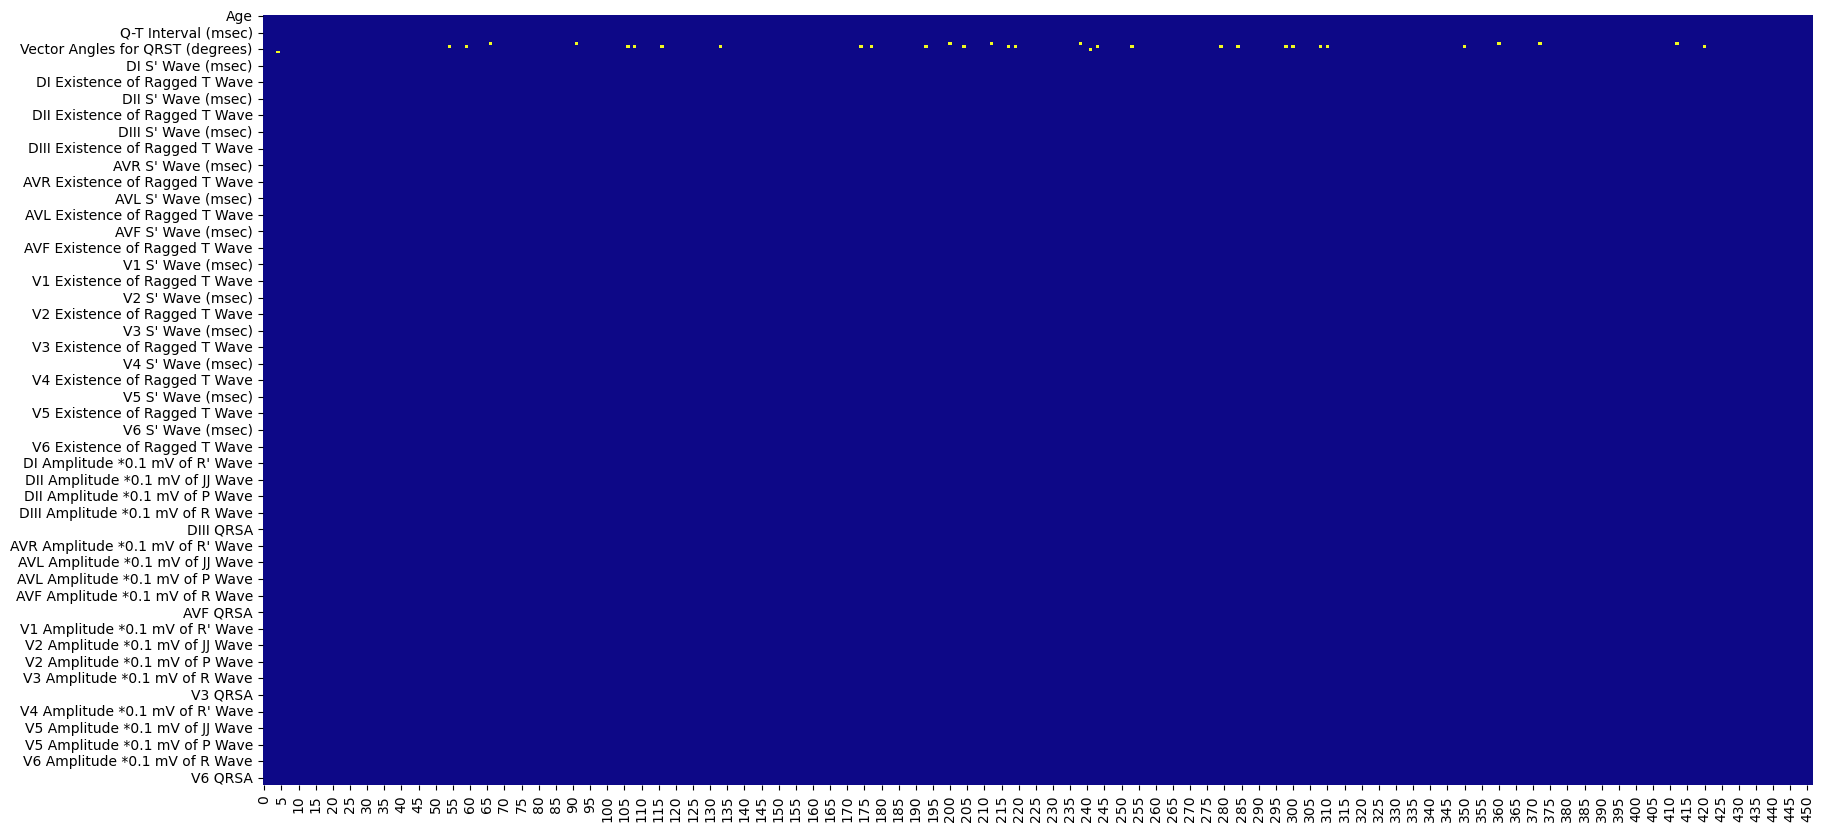

In [22]:
plt.figure(figsize = (20, 10))

splot = sb.heatmap(arrhythmia.isna().transpose(), cmap = 'plasma', cbar = False)

plt.savefig('heatmap_cleaned_data.png')

After performing machine learning modeling once, we found that some of the arrhythmia classes contained very few instances or no instances and should be removed from the dataset.  We will now look at the count of each arrhythmia diagnosis class using the `value_counts()` function.

In [23]:
diagnosis = arrhythmia['Arrhythmia Class']

diagnosis.value_counts()

1     245
10     50
2      44
6      25
16     22
3      15
4      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: Arrhythmia Class, dtype: int64

We can now see that classes $11$, $12$, and $13$ contain $0$ instances and classes $9$, $15$, $14$, $7$, and $8$ contain fewer than $10$ instances.  Since we want to perform 5-fold cross-validation for hyperparameter tuning, we will now remove all of these arrhythmia classes because they do not have enough instances for us to use in hyperparameter tuning.  

Additionally, we found that class $16$ was an `Other` class that contained a variety of very rare arrhythmia diagnoses.  Since it does not make sense to learn to diagnose `Other`, we will also remove this class from the dataset.  

We will now use the following code to select the arrhythmia classes that contain at least $10$ instances and are not `Other`.  

In [24]:
arrhythmia = arrhythmia.iloc[np.where((diagnosis < 7) | (diagnosis == 10))[0],:]

We will now double check that we have selected only the arrhythmia classes that we wanted from the data frame.

In [25]:
arrhythmia['Arrhythmia Class'].value_counts()

1     245
10     50
2      44
6      25
3      15
4      15
5      13
Name: Arrhythmia Class, dtype: int64

For K-means clustering, it is important that there are not gaps between the label values, so we will rename arrhythmia class $10$ to class $7$ in the data frame.

In [27]:
arrhythmia.iloc[np.where(arrhythmia['Arrhythmia Class'] == 10)[0], len(arrhythmia.columns)-1] = 7

We will now double check that we have replaced the arrhythmia class $10$ labels appropriately.

In [28]:
arrhythmia['Arrhythmia Class'].value_counts()

1    245
7     50
2     44
6     25
3     15
4     15
5     13
Name: Arrhythmia Class, dtype: int64

We have now successfully replaced the labels for class $10$ in the dataset!

We will now use the `describe()` method to determine how many instances are in the cleaned dataset.

In [29]:
arrhythmia.describe()

,Age,Sex,Height (cm),Weight (kg),QRS Duration (msec),P-R Interval (msec),Q-T Interval (msec),T Interval (msec),P Interval (msec),Vector Angles for QRS (degrees),...,V6 Amplitude *0.1 mV of Q wave,V6 Amplitude *0.1 mV of R Wave,V6 Amplitude *0.1 mV of S Wave,V6 Amplitude *0.1 mV of R' Wave,V6 Amplitude *0.1 mV of S' Wave,V6 Amplitude *0.1 mV of P Wave,V6 Amplitude *0.1 mV of T Wave,V6 QRSA,V6 QRSTA,Arrhythmia Class
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,...,407.000000,407.000000,407.000000,407.000000,407.0,407.000000,407.000000,407.000000,407.000000,407.000000
mean,46.235872,0.570025,166.506143,68.201474,87.100737,156.137592,366.174447,167.501229,90.921376,33.434889,...,-0.263636,8.975676,-1.463391,0.004423,0.0,0.524079,1.306388,18.482310,29.449631,2.464373
std,15.902362,0.495682,38.845904,16.502237,11.998447,41.885085,32.070451,33.186952,23.909079,45.026867,...,0.501480,3.315202,2.050054,0.052804,0.0,0.325607,1.273589,12.159842,17.876490,2.219058
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-3.200000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,147.500000,79.500000,4.000000,...,-0.400000,6.600000,-2.100000,0.000000,0.0,0.400000,0.600000,10.950000,17.900000,1.000000
50%,46.000000,1.000000,164.000000,68.000000,85.000000,157.000000,367.000000,161.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.400000,17.800000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,78.000000,93.000000,173.500000,383.000000,175.000000,102.000000,66.000000,...,0.000000,11.100000,0.000000,0.000000,0.0,0.700000,2.100000,25.450000,40.950000,4.000000
max,83.000000,1.000000,780.000000,176.000000,185.000000,524.000000,465.000000,381.000000,205.000000,169.000000,...,0.000000,19.600000,0.000000,0.800000,0.0,1.500000,6.000000,56.400000,97.600000,7.000000


Notice that there are now only $407$ instances in the cleaned dataset.

We will now write the final, cleaned data to a csv file for later use.

In [30]:
arrhythmia.to_csv('arrhythmia_cleaned.csv', index = False)

# Feature Engineering

We will now perform feature engineering on the dataset that we cleaned above.  For feature engineering, we will create a new column for each of the features that are measured at all $12$ EKG leads.  These new columns will contain the average value of that feature across all $12$ EKG leads.  Notice that this will not lose any information because all $12$ EKG leads are measuring the same cardiac activity.

In [31]:
arrhythmia['Q Wave (msec)'] = np.mean([arrhythmia['DI Q Wave (msec)'], arrhythmia['DII Q Wave (msec)'], 
                                       arrhythmia['DIII Q Wave (msec)'], arrhythmia['AVR Q Wave (msec)'], 
                                       arrhythmia['AVL Q Wave (msec)'], arrhythmia['AVF Q Wave (msec)'], 
                                       arrhythmia['V1 Q Wave (msec)'], arrhythmia['V2 Q Wave (msec)'], 
                                       arrhythmia['V3 Q Wave (msec)'], arrhythmia['V4 Q Wave (msec)'], 
                                       arrhythmia['V5 Q Wave (msec)'], arrhythmia['V6 Q Wave (msec)']])

arrhythmia['R Wave (msec)'] = np.mean([arrhythmia['DI R Wave (msec)'], arrhythmia['DII R Wave (msec)'], 
                                       arrhythmia['DIII R Wave (msec)'], arrhythmia['AVR R Wave (msec)'], 
                                       arrhythmia['AVL R Wave (msec)'], arrhythmia['AVF R Wave (msec)'], 
                                       arrhythmia['V1 R Wave (msec)'], arrhythmia['V2 R Wave (msec)'], 
                                       arrhythmia['V3 R Wave (msec)'], arrhythmia['V4 R Wave (msec)'], 
                                       arrhythmia['V5 R Wave (msec)'], arrhythmia['V6 R Wave (msec)']])

arrhythmia['S Wave (msec)'] = np.mean([arrhythmia['DI S Wave (msec)'], arrhythmia['DII S Wave (msec)'], 
                                       arrhythmia['DIII S Wave (msec)'], arrhythmia['AVR S Wave (msec)'], 
                                       arrhythmia['AVL S Wave (msec)'], arrhythmia['AVF S Wave (msec)'], 
                                       arrhythmia['V1 S Wave (msec)'], arrhythmia['V2 S Wave (msec)'], 
                                       arrhythmia['V3 S Wave (msec)'], arrhythmia['V4 S Wave (msec)'], 
                                       arrhythmia['V5 S Wave (msec)'], arrhythmia['V6 S Wave (msec)']])

arrhythmia["R' Wave (msec)"] = np.mean([arrhythmia["DI R' Wave (msec)"], arrhythmia["DII R' Wave (msec)"], 
                                        arrhythmia["DIII R' Wave (msec)"], arrhythmia["AVR R' Wave (msec)"], 
                                        arrhythmia["AVL R' Wave (msec)"], arrhythmia["AVF R' Wave (msec)"], 
                                        arrhythmia["V1 R' Wave (msec)"], arrhythmia["V2 R' Wave (msec)"], 
                                        arrhythmia["V3 R' Wave (msec)"], arrhythmia["V4 R' Wave (msec)"], 
                                        arrhythmia["V5 R' Wave (msec)"], arrhythmia["V6 R' Wave (msec)"]])

arrhythmia["S' Wave (msec)"] = np.mean([arrhythmia["DI S' Wave (msec)"], arrhythmia["DII S' Wave (msec)"], 
                                        arrhythmia["DIII S' Wave (msec)"], arrhythmia["AVR S' Wave (msec)"], 
                                        arrhythmia["AVL S' Wave (msec)"], arrhythmia["AVF S' Wave (msec)"], 
                                        arrhythmia["V1 S' Wave (msec)"], arrhythmia["V2 S' Wave (msec)"], 
                                        arrhythmia["V3 S' Wave (msec)"], arrhythmia["V4 S' Wave (msec)"], 
                                        arrhythmia["V5 S' Wave (msec)"], arrhythmia["V6 S' Wave (msec)"]])

arrhythmia['Number of Intrinsic Deflections'] = np.mean([arrhythmia['DI Number of Intrinsic Deflections'], 
                                                         arrhythmia['DII Number of Intrinsic Deflections'], 
                                                         arrhythmia['DIII Number of Intrinsic Deflections'], 
                                                         arrhythmia['AVR Number of Intrinsic Deflections'], 
                                                         arrhythmia['AVL Number of Intrinsic Deflections'], 
                                                         arrhythmia['AVF Number of Intrinsic Deflections'], 
                                                         arrhythmia['V1 Number of Intrinsic Deflections'], 
                                                         arrhythmia['V2 Number of Intrinsic Deflections'], 
                                                         arrhythmia['V3 Number of Intrinsic Deflections'], 
                                                         arrhythmia['V4 Number of Intrinsic Deflections'], 
                                                         arrhythmia['V5 Number of Intrinsic Deflections'], 
                                                         arrhythmia['V6 Number of Intrinsic Deflections']])

arrhythmia['Existence of Ragged R Wave'] = np.mean([arrhythmia['DI Existence of Ragged R Wave'], 
                                                    arrhythmia['DII Existence of Ragged R Wave'], 
                                                    arrhythmia['DIII Existence of Ragged R Wave'], 
                                                    arrhythmia['AVR Existence of Ragged R Wave'], 
                                                    arrhythmia['AVL Existence of Ragged R Wave'], 
                                                    arrhythmia['AVF Existence of Ragged R Wave'],
                                                    arrhythmia['V1 Existence of Ragged R Wave'], 
                                                    arrhythmia['V2 Existence of Ragged R Wave'], 
                                                    arrhythmia['V3 Existence of Ragged R Wave'], 
                                                    arrhythmia['V4 Existence of Ragged R Wave'], 
                                                    arrhythmia['V5 Existence of Ragged R Wave'], 
                                                    arrhythmia['V6 Existence of Ragged R Wave']])

arrhythmia['Existence of Diphasic Derivation of R Wave'] = np.mean([arrhythmia['DI Existence of Diphasic Derivation of R Wave'], 
                                                                    arrhythmia['DII Existence of Diphasic Derivation of R Wave'], 
                                                                    arrhythmia['DIII Existence of Diphasic Derivation of R Wave'], 
                                                                    arrhythmia['AVR Existence of Diphasic Derivation of R Wave'], 
                                                                    arrhythmia['AVL Existence of Diphasic Derivation of R Wave'], 
                                                                    arrhythmia['AVF Existence of Diphasic Derivation of R Wave'], 
                                                                    arrhythmia['V1 Existence of Diphasic Derivation of R Wave'], 
                                                                    arrhythmia['V2 Existence of Diphasic Derivation of R Wave'], 
                                                                    arrhythmia['V3 Existence of Diphasic Derivation of R Wave'], 
                                                                    arrhythmia['V4 Existence of Diphasic Derivation of R Wave'], 
                                                                    arrhythmia['V5 Existence of Diphasic Derivation of R Wave'], 
                                                                    arrhythmia['V6 Existence of Diphasic Derivation of R Wave']])

arrhythmia['Existence of Ragged P Wave'] = np.mean([arrhythmia['DI Existence of Raged P Wave'], 
                                                    arrhythmia['DII Existence of Raged P Wave'], 
                                                    arrhythmia['DIII Existence of Raged P Wave'], 
                                                    arrhythmia['AVR Existence of Raged P Wave'], 
                                                    arrhythmia['AVL Existence of Raged P Wave'], 
                                                    arrhythmia['AVF Existence of Raged P Wave'], 
                                                    arrhythmia['V1 Existence of Raged P Wave'], 
                                                    arrhythmia['V2 Existence of Raged P Wave'], 
                                                    arrhythmia['V3 Existence of Raged P Wave'], 
                                                    arrhythmia['V4 Existence of Raged P Wave'], 
                                                    arrhythmia['V5 Existence of Raged P Wave'], 
                                                    arrhythmia['V6 Existence of Raged P Wave']])

arrhythmia['Existence of Diphasic Derivation of P Wave'] = np.mean([arrhythmia['DI Existence of Diphasic Derivation of P Wave'], 
                                                                    arrhythmia['DII Existence of Diphasic Derivation of P Wave'], 
                                                                    arrhythmia['DIII Existence of Diphasic Derivation of P Wave'], 
                                                                    arrhythmia['AVR Existence of Diphasic Derivation of P Wave'], 
                                                                    arrhythmia['AVL Existence of Diphasic Derivation of P Wave'], 
                                                                    arrhythmia['AVF Existence of Diphasic Derivation of P Wave'], 
                                                                    arrhythmia['V1 Existence of Diphasic Derivation of P Wave'], 
                                                                    arrhythmia['V2 Existence of Diphasic Derivation of P Wave'], 
                                                                    arrhythmia['V3 Existence of Diphasic Derivation of P Wave'], 
                                                                    arrhythmia['V4 Existence of Diphasic Derivation of P Wave'], 
                                                                    arrhythmia['V5 Existence of Diphasic Derivation of P Wave'], 
                                                                    arrhythmia['V6 Existence of Diphasic Derivation of P Wave']])

arrhythmia['Existence of Ragged T Wave'] = np.mean([arrhythmia['DI Existence of Ragged T Wave'], 
                                                    arrhythmia['DII Existence of Ragged T Wave'], 
                                                    arrhythmia['DIII Existence of Ragged T Wave'], 
                                                    arrhythmia['AVR Existence of Ragged T Wave'], 
                                                    arrhythmia['AVL Existence of Ragged T Wave'], 
                                                    arrhythmia['AVF Existence of Ragged T Wave'], 
                                                    arrhythmia['V1 Existence of Ragged T Wave'], 
                                                    arrhythmia['V2 Existence of Ragged T Wave'], 
                                                    arrhythmia['V3 Existence of Ragged T Wave'], 
                                                    arrhythmia['V4 Existence of Ragged T Wave'], 
                                                    arrhythmia['V5 Existence of Ragged T Wave'], 
                                                    arrhythmia['V6 Existence of Ragged T Wave']])

arrhythmia['Existence of Diphasic Derivation of T Wave'] = np.mean([arrhythmia['DI Existence of Diphasic Derivation of T Wave'], 
                                                                    arrhythmia['DII Existence of Diphasic Derivation of T Wave'], 
                                                                    arrhythmia['DIII Existence of Diphasic Derivation of T Wave'], 
                                                                    arrhythmia['AVR Existence of Diphasic Derivation of T Wave'], 
                                                                    arrhythmia['AVL Existence of Diphasic Derivation of T Wave'], 
                                                                    arrhythmia['AVF Existence of Diphasic Derivation of T Wave'], 
                                                                    arrhythmia['V1 Existence of Diphasic Derivation of T Wave'], 
                                                                    arrhythmia['V2 Existence of Diphasic Derivation of T Wave'], 
                                                                    arrhythmia['V3 Existence of Diphasic Derivation of T Wave'], 
                                                                    arrhythmia['V4 Existence of Diphasic Derivation of T Wave'], 
                                                                    arrhythmia['V5 Existence of Diphasic Derivation of T Wave'], 
                                                                    arrhythmia['V6 Existence of Diphasic Derivation of T Wave']])

arrhythmia['Amplitude *0.1 mV of JJ Wave'] = np.mean([arrhythmia['DI Amplitude *0.1 mV of JJ Wave'], 
                                                      arrhythmia['DII Amplitude *0.1 mV of JJ Wave'], 
                                                      arrhythmia['DIII Amplitude *0.1 mV of JJ Wave'], 
                                                      arrhythmia['AVR Amplitude *0.1 mV of JJ Wave'], 
                                                      arrhythmia['AVL Amplitude *0.1 mV of JJ Wave'], 
                                                      arrhythmia['AVF Amplitude *0.1 mV of JJ Wave'], 
                                                      arrhythmia['V1 Amplitude *0.1 mV of JJ Wave'], 
                                                      arrhythmia['V2 Amplitude *0.1 mV of JJ Wave'], 
                                                      arrhythmia['V3 Amplitude *0.1 mV of JJ Wave'], 
                                                      arrhythmia['V4 Amplitude *0.1 mV of JJ Wave'], 
                                                      arrhythmia['V5 Amplitude *0.1 mV of JJ Wave'], 
                                                      arrhythmia['V6 Amplitude *0.1 mV of JJ Wave']])

arrhythmia['Amplitude *0.1 mV of Q Wave'] = np.mean([arrhythmia['DI Amplitude *0.1 mV of Q wave'], 
                                                     arrhythmia['DII Amplitude *0.1 mV of Q wave'], 
                                                     arrhythmia['DIII Amplitude *0.1 mV of Q wave'], 
                                                     arrhythmia['AVR Amplitude *0.1 mV of Q wave'], 
                                                     arrhythmia['AVL Amplitude *0.1 mV of Q wave'], 
                                                     arrhythmia['AVF Amplitude *0.1 mV of Q wave'], 
                                                     arrhythmia['V1 Amplitude *0.1 mV of Q wave'], 
                                                     arrhythmia['V2 Amplitude *0.1 mV of Q wave'], 
                                                     arrhythmia['V3 Amplitude *0.1 mV of Q wave'], 
                                                     arrhythmia['V4 Amplitude *0.1 mV of Q wave'], 
                                                     arrhythmia['V5 Amplitude *0.1 mV of Q wave'], 
                                                     arrhythmia['V6 Amplitude *0.1 mV of Q wave']])

arrhythmia['Amplitude *0.1 mV of R Wave'] = np.mean([arrhythmia['DI Amplitude *0.1 mV of R Wave'], 
                                                     arrhythmia['DII Amplitude *0.1 mV of R Wave'], 
                                                     arrhythmia['DIII Amplitude *0.1 mV of R Wave'], 
                                                     arrhythmia['AVR Amplitude *0.1 mV of R Wave'], 
                                                     arrhythmia['AVL Amplitude *0.1 mV of R Wave'], 
                                                     arrhythmia['AVF Amplitude *0.1 mV of R Wave'], 
                                                     arrhythmia['V1 Amplitude *0.1 mV of R Wave'], 
                                                     arrhythmia['V2 Amplitude *0.1 mV of R Wave'], 
                                                     arrhythmia['V3 Amplitude *0.1 mV of R Wave'], 
                                                     arrhythmia['V4 Amplitude *0.1 mV of R Wave'], 
                                                     arrhythmia['V5 Amplitude *0.1 mV of R Wave'], 
                                                     arrhythmia['V6 Amplitude *0.1 mV of R Wave']])

arrhythmia['Amplitude *0.1 mV of S Wave'] = np.mean([arrhythmia['DI Amplitude *0.1 mV of S Wave'], 
                                                     arrhythmia['DII Amplitude *0.1 mV of S Wave'], 
                                                     arrhythmia['DIII Amplitude *0.1 mV of S Wave'], 
                                                     arrhythmia['AVR Amplitude *0.1 mV of S Wave'], 
                                                     arrhythmia['AVL Amplitude *0.1 mV of S Wave'], 
                                                     arrhythmia['AVF Amplitude *0.1 mV of S Wave'], 
                                                     arrhythmia['V1 Amplitude *0.1 mV of S Wave'], 
                                                     arrhythmia['V2 Amplitude *0.1 mV of S Wave'], 
                                                     arrhythmia['V3 Amplitude *0.1 mV of S Wave'], 
                                                     arrhythmia['V4 Amplitude *0.1 mV of S Wave'], 
                                                     arrhythmia['V5 Amplitude *0.1 mV of S Wave'], 
                                                     arrhythmia['V6 Amplitude *0.1 mV of S Wave']])

arrhythmia["Amplitude *0.1 mV of R' Wave"] = np.mean([arrhythmia["DI Amplitude *0.1 mV of R' Wave"], 
                                                      arrhythmia["DII Amplitude *0.1 mV of R' Wave"], 
                                                      arrhythmia["DIII Amplitude *0.1 mV of R' Wave"], 
                                                      arrhythmia["AVR Amplitude *0.1 mV of R' Wave"], 
                                                      arrhythmia["AVL Amplitude *0.1 mV of R' Wave"], 
                                                      arrhythmia["AVF Amplitude *0.1 mV of R' Wave"], 
                                                      arrhythmia["V1 Amplitude *0.1 mV of R' Wave"], 
                                                      arrhythmia["V2 Amplitude *0.1 mV of R' Wave"], 
                                                      arrhythmia["V3 Amplitude *0.1 mV of R' Wave"], 
                                                      arrhythmia["V4 Amplitude *0.1 mV of R' Wave"], 
                                                      arrhythmia["V5 Amplitude *0.1 mV of R' Wave"], 
                                                      arrhythmia["V6 Amplitude *0.1 mV of R' Wave"]])

arrhythmia["Amplitude *0.1 mV of S' Wave"] = np.mean([arrhythmia["DI Amplitude *0.1 mV of S' Wave"], 
                                                      arrhythmia["DII Amplitude *0.1 mV of S' Wave"], 
                                                      arrhythmia["DIII Amplitude *0.1 mV of S' Wave"], 
                                                      arrhythmia["AVR Amplitude *0.1 mV of S' Wave"], 
                                                      arrhythmia["AVL Amplitude *0.1 mV of S' Wave"], 
                                                      arrhythmia["AVF Amplitude *0.1 mV of S' Wave"], 
                                                      arrhythmia["V1 Amplitude *0.1 mV of S' Wave"], 
                                                      arrhythmia["V2 Amplitude *0.1 mV of S' Wave"], 
                                                      arrhythmia["V3 Amplitude *0.1 mV of S' Wave"], 
                                                      arrhythmia["V4 Amplitude *0.1 mV of S' Wave"], 
                                                      arrhythmia["V5 Amplitude *0.1 mV of S' Wave"], 
                                                      arrhythmia["V6 Amplitude *0.1 mV of S' Wave"]])

arrhythmia['Amplitude *0.1 mV of P Wave'] = np.mean([arrhythmia['DI Amplitude *0.1 mV of P Wave'], 
                                                     arrhythmia['DII Amplitude *0.1 mV of P Wave'], 
                                                     arrhythmia['DIII Amplitude *0.1 mV of P Wave'], 
                                                     arrhythmia['AVR Amplitude *0.1 mV of P Wave'], 
                                                     arrhythmia['AVL Amplitude *0.1 mV of P Wave'], 
                                                     arrhythmia['AVF Amplitude *0.1 mV of P Wave'], 
                                                     arrhythmia['V1 Amplitude *0.1 mV of P Wave'], 
                                                     arrhythmia['V2 Amplitude *0.1 mV of P Wave'], 
                                                     arrhythmia['V3 Amplitude *0.1 mV of P Wave'], 
                                                     arrhythmia['V4 Amplitude *0.1 mV of P Wave'], 
                                                     arrhythmia['V5 Amplitude *0.1 mV of P Wave'], 
                                                     arrhythmia['V6 Amplitude *0.1 mV of P Wave']])

arrhythmia['Amplitude *0.1 mV of T Wave'] = np.mean([arrhythmia['DI Amplitude *0.1 mV of T Wave'], 
                                                     arrhythmia['DII Amplitude *0.1 mV of T Wave'], 
                                                     arrhythmia['DIII Amplitude *0.1 mV of T Wave'], 
                                                     arrhythmia['AVR Amplitude *0.1 mV of T Wave'], 
                                                     arrhythmia['AVL Amplitude *0.1 mV of T Wave'], 
                                                     arrhythmia['AVF Amplitude *0.1 mV of T Wave'], 
                                                     arrhythmia['V1 Amplitude *0.1 mV of T Wave'], 
                                                     arrhythmia['V2 Amplitude *0.1 mV of T Wave'], 
                                                     arrhythmia['V3 Amplitude *0.1 mV of T Wave'], 
                                                     arrhythmia['V4 Amplitude *0.1 mV of T Wave'], 
                                                     arrhythmia['V5 Amplitude *0.1 mV of T Wave'], 
                                                     arrhythmia['V6 Amplitude *0.1 mV of T Wave']])

arrhythmia['QRSA'] = np.mean([arrhythmia['DI QRSA'], arrhythmia['DII QRSA'], arrhythmia['DIII QRSA'], 
                              arrhythmia['AVR QRSA'], arrhythmia['AVL QRSA'], arrhythmia['AVF QRSA'], 
                              arrhythmia['V1 QRSA'], arrhythmia['V2 QRSA'], arrhythmia['V3 QRSA'], 
                              arrhythmia['V4 QRSA'], arrhythmia['V5 QRSA'], arrhythmia['V6 QRSA']])

arrhythmia['QRSTA'] = np.mean([arrhythmia['DI QRSTA'], arrhythmia['DII QRSTA'], arrhythmia['DIII QRSTA'], 
                               arrhythmia['AVR QRSTA'], arrhythmia['AVL QRSTA'], arrhythmia['AVF QRSTA'], 
                               arrhythmia['V1 QRSTA'], arrhythmia['V2 QRSTA'], arrhythmia['V3 QRSTA'], 
                               arrhythmia['V4 QRSTA'], arrhythmia['V5 QRSTA'], arrhythmia['V6 QRSTA']])

We will now print the columns containing the feature engineered columns and the arrhythmia diagnosis.

In [32]:
arrhythmia.columns[-23:]

Index(['Arrhythmia Class', 'Q Wave (msec)', 'R Wave (msec)', 'S Wave (msec)',
       'R' Wave (msec)', 'S' Wave (msec)', 'Number of Intrinsic Deflections',
       'Existence of Ragged R Wave',
       'Existence of Diphasic Derivation of R Wave',
       'Existence of Ragged P Wave',
       'Existence of Diphasic Derivation of P Wave',
       'Existence of Ragged T Wave',
       'Existence of Diphasic Derivation of T Wave',
       'Amplitude *0.1 mV of JJ Wave', 'Amplitude *0.1 mV of Q Wave',
       'Amplitude *0.1 mV of R Wave', 'Amplitude *0.1 mV of S Wave',
       'Amplitude *0.1 mV of R' Wave', 'Amplitude *0.1 mV of S' Wave',
       'Amplitude *0.1 mV of P Wave', 'Amplitude *0.1 mV of T Wave', 'QRSA',
       'QRSTA'],
      dtype='object')

We will now print the columns containing the demographic features and the features relating to the EKG overall. 

In [33]:
arrhythmia.columns[:14]

Index(['Age', 'Sex', 'Height (cm)', 'Weight (kg)', 'QRS Duration (msec)',
       'P-R Interval (msec)', 'Q-T Interval (msec)', 'T Interval (msec)',
       'P Interval (msec)', 'Vector Angles for QRS (degrees)',
       'Vector Angles for T (degrees)', 'Vector Angles for P (degrees)',
       'Vector Angles for QRST (degrees)', 'Heart Rate (bpm)'],
      dtype='object')

We will now create a list containing the names of the demographic columns, columns containing data about the EKG overall, the feature engineering columns, and the arrhythmia diagnosis.  We will then print this list to double check that we have all the necessary columns.

In [34]:
feat_eng_cols = []

for col in arrhythmia.columns[:14]:
    feat_eng_cols.append(col)
    
for col in arrhythmia.columns[-23:]:
    feat_eng_cols.append(col)

feat_eng_cols

['Age',
 'Sex',
 'Height (cm)',
 'Weight (kg)',
 'QRS Duration (msec)',
 'P-R Interval (msec)',
 'Q-T Interval (msec)',
 'T Interval (msec)',
 'P Interval (msec)',
 'Vector Angles for QRS (degrees)',
 'Vector Angles for T (degrees)',
 'Vector Angles for P (degrees)',
 'Vector Angles for QRST (degrees)',
 'Heart Rate (bpm)',
 'Arrhythmia Class',
 'Q Wave (msec)',
 'R Wave (msec)',
 'S Wave (msec)',
 "R' Wave (msec)",
 "S' Wave (msec)",
 'Number of Intrinsic Deflections',
 'Existence of Ragged R Wave',
 'Existence of Diphasic Derivation of R Wave',
 'Existence of Ragged P Wave',
 'Existence of Diphasic Derivation of P Wave',
 'Existence of Ragged T Wave',
 'Existence of Diphasic Derivation of T Wave',
 'Amplitude *0.1 mV of JJ Wave',
 'Amplitude *0.1 mV of Q Wave',
 'Amplitude *0.1 mV of R Wave',
 'Amplitude *0.1 mV of S Wave',
 "Amplitude *0.1 mV of R' Wave",
 "Amplitude *0.1 mV of S' Wave",
 'Amplitude *0.1 mV of P Wave',
 'Amplitude *0.1 mV of T Wave',
 'QRSA',
 'QRSTA']

We will now select the columns for the feature engineering dataset from the original dataset.  Notice that these columns are the same as those printed above.

In [35]:
arrhythmia_feat_eng = arrhythmia.loc[:,feat_eng_cols]

We will now use the `describe()` method to look at the total number of instances in the feature engineered dataset.  

In [36]:
arrhythmia_feat_eng.describe()

,Age,Sex,Height (cm),Weight (kg),QRS Duration (msec),P-R Interval (msec),Q-T Interval (msec),T Interval (msec),P Interval (msec),Vector Angles for QRS (degrees),...,Amplitude *0.1 mV of JJ Wave,Amplitude *0.1 mV of Q Wave,Amplitude *0.1 mV of R Wave,Amplitude *0.1 mV of S Wave,Amplitude *0.1 mV of R' Wave,Amplitude *0.1 mV of S' Wave,Amplitude *0.1 mV of P Wave,Amplitude *0.1 mV of T Wave,QRSA,QRSTA
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,...,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02
mean,46.235872,0.570025,166.506143,68.201474,87.100737,156.137592,366.174447,167.501229,90.921376,33.434889,...,9.891482e-02,-9.115070e-01,5.976065e+00,-3.657985e+00,8.097871e-02,-6.306306e-03,3.085586e-01,1.211609e+00,3.695762e+00,1.480246e+01
std,15.902362,0.495682,38.845904,16.502237,11.998447,41.885085,32.070451,33.186952,23.909079,45.026867,...,5.141101e-16,6.669537e-15,4.446358e-15,1.156053e-14,3.612666e-16,1.736859e-17,4.446358e-16,4.890994e-15,4.446358e-16,3.557086e-15
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,9.891482e-02,-9.115070e-01,5.976065e+00,-3.657985e+00,8.097871e-02,-6.306306e-03,3.085586e-01,1.211609e+00,3.695762e+00,1.480246e+01
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,147.500000,79.500000,4.000000,...,9.891482e-02,-9.115070e-01,5.976065e+00,-3.657985e+00,8.097871e-02,-6.306306e-03,3.085586e-01,1.211609e+00,3.695762e+00,1.480246e+01
50%,46.000000,1.000000,164.000000,68.000000,85.000000,157.000000,367.000000,161.000000,91.000000,40.000000,...,9.891482e-02,-9.115070e-01,5.976065e+00,-3.657985e+00,8.097871e-02,-6.306306e-03,3.085586e-01,1.211609e+00,3.695762e+00,1.480246e+01
75%,58.000000,1.000000,170.000000,78.000000,93.000000,173.500000,383.000000,175.000000,102.000000,66.000000,...,9.891482e-02,-9.115070e-01,5.976065e+00,-3.657985e+00,8.097871e-02,-6.306306e-03,3.085586e-01,1.211609e+00,3.695762e+00,1.480246e+01
max,83.000000,1.000000,780.000000,176.000000,185.000000,524.000000,465.000000,381.000000,205.000000,169.000000,...,9.891482e-02,-9.115070e-01,5.976065e+00,-3.657985e+00,8.097871e-02,-6.306306e-03,3.085586e-01,1.211609e+00,3.695762e+00,1.480246e+01


As before, there are $407$ instances in the feature engineering dataset.  We will now use the `info()` method to check that all the data types are correct.

In [37]:
arrhythmia_feat_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 1 to 451
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         407 non-null    int64  
 1   Sex                                         407 non-null    int64  
 2   Height (cm)                                 407 non-null    int64  
 3   Weight (kg)                                 407 non-null    int64  
 4   QRS Duration (msec)                         407 non-null    int64  
 5   P-R Interval (msec)                         407 non-null    int64  
 6   Q-T Interval (msec)                         407 non-null    int64  
 7   T Interval (msec)                           407 non-null    int64  
 8   P Interval (msec)                           407 non-null    int64  
 9   Vector Angles for QRS (degrees)             407 non-null    int64  
 10  Vector Angles 

Since everything looks good in the feature engineering dataset, we will now write it to a csv file.

In [38]:
arrhythmia_feat_eng.to_csv('arrhythmia_feat_eng.csv', index = False)